In [1]:
import numpy as np
import pandas as pd
import requests

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from google.colab import drive
import nltk 
nltk.download('punkt')
from nltk import word_tokenize
import pandas as pd
import csv
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt
import seaborn as sns         
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
!pip install dateparser

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 288 kB 13.3 MB/s 
     |████████████████████████████████| 749 kB 8.6 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2022.6.2
    Uninstalling regex-2022.6.2:
      Successfully uninstalled regex-2022.6.2


In [ ]:
# Use this code if using Colab to run Selenium

# Make sure to go to Runtime -> Change runtime and set GPU as hardware accelerator

# !kill -9 -1 # Use this line to delete this VM and start a new one. 
# The above line deletes all files and folders from the current VM and allocates a new one.

#Selenium is an open-source tool that automates web browsers.
!pip install selenium
!apt-get -q update   #Used to handle installation and removal of softwares and libraries
!apt install -yq chromium-chromedriver #ChromeDriver is a separate executable that Selenium WebDriver uses to control Chrome.
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.by import By
#WebDriver is a browser automation framework that works with open source APIs. 
#The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.
chrome_options = webdriver.ChromeOptions()
#headless means running chrome with chrome.exe
chrome_options.add_argument('--headless')

chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',options=chrome_options)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu

In [ ]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import time
from selenium import webdriver
import re
!pip install dateparser
import dateparser

######################################
#1. scrape speeches from MillerCenter#
######################################

#start Chromedriver and access MillerCenter website#
driver = webdriver.Chrome('chromedriver',options=chrome_options)
url = "https://millercenter.org/the-presidency/presidential-speeches"
driver.get(url)
driver.implicitly_wait(10)
SCROLL_PAUSE_TIME = 4
last_height = driver.execute_script("return document.body.scrollHeight")
while True:
    import datetime
    time_past = datetime.datetime.now()
    while (datetime.datetime.now() - time_past).seconds <=SCROLL_PAUSE_TIME:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#retrieve urls to all speeches#
page_source = driver.page_source
bsobject_linkpage = bs(page_source,'lxml')
links = bsobject_linkpage.find_all("a", href= re.compile('presidential-speeches/'))
link_list = list()
for link in links:
    link_specific = link['href']
    link_list.append("https://millercenter.org"+link_specific)


In [ ]:
#Doing this to remove errors
!pip uninstall regex -y
!pip install regex==2022.3.2

Found existing installation: regex 2022.3.2
Uninstalling regex-2022.3.2:
  Successfully uninstalled regex-2022.3.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached regex-2022.3.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (749 kB)


In [ ]:
#scrape the speech#
title, speech, name, date, about = ([] for i in range(5))
for index,link in enumerate(link_list):
    #access speech page with Selenium and load html source into Beautifulsoup#
    driver.get(link_list[index])
    try:
      driver.find_element(By.CSS_SELECTOR, 'div[class="transcript-inner"]')
    except:
      driver.find_element(By.CSS_SELECTOR, 'div[class="view-transcript"]')
    page_source = driver.page_source
    bsobject_speechpage = bs(page_source, 'lxml')

    #scrape speech and other properties#
    title.append((bsobject_speechpage.find('h2', class_="presidential-speeches--title").text).rstrip())
    try:
        speech_raw = bsobject_speechpage.find('div', class_="transcript-inner").text
    except:
        speech_raw = (bsobject_speechpage.find('div', class_="view-transcript").text).rstrip()
    speech.append(re.sub("Transcript|\\n"," ",speech_raw))
    name.append((bsobject_speechpage.find('p', class_="president-name").text).rstrip())
    date.append((dateparser.parse(bsobject_speechpage.find('p', class_="episode-date").text)))
    try:
        about_raw = bsobject_speechpage.find('div', class_="about-sidebar--intro").text.rstrip()
    except:
        about_raw = about.append("No info available")
    empty = ""
    if about_raw == empty:
        about_raw = "No info available"    
        about.append(re.sub("\\n"," ","No info available"))
    else:
        about.append(re.sub("\\n"," ",str(about_raw)))
    print(about_raw) #to be apprised of current status


President Joe Biden speaks in Philadelphia, Pennsylvania, about the state of American democracy. He warns against threats from former President Donald Trump and MAGA Republicans, who are unwilling to admit defeat in the 2020 election and threaten political violence if they do not get their way. Biden stresses the tenets of US democracy such as the rule of law, free and fair elections, and liberty and justice for all.
President Biden makes an impassioned plea to stand up to the gun lobby after a mass shooting at an elementary school in Uvalde, Texas, where 19 children and 2 teachers were killed. He calls on elected leaders to pass commonsense gun control laws and notes that "It’s time to turn this pain into action."
At the Royal Castle in Warsaw, Poland, President Joe Biden talks about Russian aggression and the war in Ukraine. He points to the unity of the democracies in Europe and their resolve to support Ukraine in its fight against Russia. He pleads to the Russian people to know tha

In [ ]:
#save this to a dataframe and save to a csv file#
speeches_presidents = pd.DataFrame({'name':name,'title':title,'date':date,'info':about,'speech':speech}, columns=['name','title','date','info','speech'])
speeches_presidents['speech'] = speeches_presidents['speech'].apply(lambda x: x.replace(".",". "))
speeches_presidents.to_csv("speeches.csv", encoding="utf-8",quotechar="'",index=False)

NameError: ignored

In [ ]:
#save this to a dataframe and save to a csv file#
about=about.remove('None') #removing extra occurrences of None
speeches_presidents = pd.DataFrame({'name':name,'title':title,'date':date,'info':about,'speech':speech}, columns=['name','title','date','info','speech'])
speeches_presidents['speech'] = speeches_presidents['speech'].apply(lambda x: x.replace(".",". "))
speeches_presidents.to_csv("speeches.csv", encoding="utf-8",quotechar="'",index=False)

In [ ]:
raw = pd.read_excel('speeches.xlsx')
raw.drop('info', inplace=True, axis=1)
raw[25:30]

,name,title,date,speech
25,Donald Trump,"August 8, 2020: Press Conference on Executive ...",2020-08-08,"Thank you very much everybody. Thank you, ..."
26,Donald Trump,"July 4, 2020: Remarks at Salute to America",2020-07-04,THE PRESIDENT: Wow. Are you having a good ...
27,Donald Trump,"June 20, 2020: Campaign Rally in Tulsa, Oklahoma",2020-06-20,"Thank you, thank you. So we begin, Oklahom..."
28,Donald Trump,"June 13, 2020: Address at West Point Graduation",2020-06-13,"Thank you, General, and hello cadets. On b..."
29,Donald Trump,"June 1, 2020: Statement on Protests Against Po...",2020-06-01,Thank you very much. My fellow Americans: ...


In [ ]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')

# lower case for all the reviews
def lowerize(x):
  list1 = []
  for i in x:
    list1.append(str.lower(i))
  return list1


freq = raw.copy()

# lower case the whole speech
freq['speech'] = freq['speech'].str.lower()

# creating a column without stop words
stop = stopwords.words('english')
freq['no_stopwords'] = freq['speech'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Removing punctuation from no_stopwords
freq['no_stopwords'] = freq['no_stopwords'].str.replace(r'[^\w\s]+', '')

# tokenizing
freq['tokenized'] = freq['no_stopwords'].apply(word_tokenize)
freq

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: The default value of regex will change from True to False in a future version.


,name,title,date,speech,no_stopwords,tokenized
0,Joe Biden,"September 1, 2022: Remarks on the Continued Ba...",2022-09-01,"the president: my fellow americans, please,...",president fellow americans please seat take it...,"[president, fellow, americans, please, seat, t..."
1,Joe Biden,"May 24, 2022: Remarks on School Shooting in Uv...",2022-05-24,"good evening, fellow americans. i had hope...",good evening fellow americans hoped became pre...,"[good, evening, fellow, americans, hoped, beca..."
2,Joe Biden,"March 26, 2022: Remarks in Support of the Peop...",2022-03-26,"the president: thank you, thank you, thank ...",president thank you thank you thank you please...,"[president, thank, you, thank, you, thank, you..."
3,Joe Biden,"March 1, 2022: State of the Union Address",2022-03-01,speaker of the house nancy pelosi: members ...,speaker house nancy pelosi members congress hi...,"[speaker, house, nancy, pelosi, members, congr..."
4,Joe Biden,"February 24, 2022: Remarks on the Russian Inva...",2022-02-24,the president: sorry to keep you waiting. ...,president sorry keep waiting good afternoon ru...,"[president, sorry, keep, waiting, good, aftern..."
...,...,...,...,...,...,...
1028,George Washington,"December 29, 1790: Talk to the Chiefs and Coun...",1790-12-29,"i the president of the united states, by my ...",president united states mouth written speech s...,"[president, united, states, mouth, written, sp..."
1029,George Washington,"December 8, 1790: Second Annual Message to Con...",1790-12-08,fellow citizens of the senate and house of r...,fellow citizens senate house representatives m...,"[fellow, citizens, senate, house, representati..."
1030,George Washington,"January 8, 1790: First Annual Message to Congress",1790-01-08,fellow citizens of the senate and house of re...,fellow citizens senate house representatives e...,"[fellow, citizens, senate, house, representati..."
1031,George Washington,"October 3, 1789: Thanksgiving Proclamation",1789-10-03,whereas it is the duty of all nations to ackn...,whereas duty nations acknowledge providence al...,"[whereas, duty, nations, acknowledge, providen..."


In [ ]:
# installing textblob stuff
!pip install -U textblob
!python -m textblob.download_corpora

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 7.6 MB/s 
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
from textblob import TextBlob

In [ ]:
# subjectivity/polarity vs sentiment
def detect_polarity(text):
    return TextBlob(text).sentiment.polarity
def detect_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# copy of original dataframe
df_tb = freq.copy()
df_tb['polarity'] = df_tb.speech.apply(detect_polarity)
df_tb['subjectivity'] = df_tb.speech.apply(detect_subjectivity)
df_tb.head()

,name,title,date,speech,no_stopwords,tokenized,polarity,subjectivity
0,Joe Biden,"September 1, 2022: Remarks on the Continued Ba...",2022-09-01,"the president: my fellow americans, please,...",president fellow americans please seat take it...,"[president, fellow, americans, please, seat, t...",0.113647,0.501089
1,Joe Biden,"May 24, 2022: Remarks on School Shooting in Uv...",2022-05-24,"good evening, fellow americans. i had hope...",good evening fellow americans hoped became pre...,"[good, evening, fellow, americans, hoped, beca...",0.101109,0.467637
2,Joe Biden,"March 26, 2022: Remarks in Support of the Peop...",2022-03-26,"the president: thank you, thank you, thank ...",president thank you thank you thank you please...,"[president, thank, you, thank, you, thank, you...",0.112610,0.427427
3,Joe Biden,"March 1, 2022: State of the Union Address",2022-03-01,speaker of the house nancy pelosi: members ...,speaker house nancy pelosi members congress hi...,"[speaker, house, nancy, pelosi, members, congr...",0.139627,0.416267
4,Joe Biden,"February 24, 2022: Remarks on the Russian Inva...",2022-02-24,the president: sorry to keep you waiting. ...,president sorry keep waiting good afternoon ru...,"[president, sorry, keep, waiting, good, aftern...",0.061349,0.417443


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 7.3 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):
	sid_obj = SentimentIntensityAnalyzer()
	sentiment_score = sid_obj.polarity_scores(sentence)['compound']
	return sentiment_score

df_tb['sentiment'] = df_tb.speech.apply(sentiment_scores)

In [ ]:
# creating df that we are going to plot
import matplotlib.pyplot as plt
df_tb_plot = pd.pivot_table(df_tb, values=['polarity','subjectivity','sentiment'], index=['name'], aggfunc={'polarity':np.mean, 'subjectivity':np.mean, 'sentiment': np.mean})
df_tb_plot = df_tb_plot.sort_values(by = 'subjectivity', ascending = True)
df_tb_plot


,polarity,sentiment,subjectivity
name,,,
John Quincy Adams,0.108966,0.998375,0.401787
Franklin Pierce,0.084860,0.863300,0.404817
James Madison,0.129029,0.924118,0.405777
Rutherford B. Hayes,0.094756,0.975850,0.406551
James K. Polk,0.094671,0.837608,0.411019
Andrew Johnson,0.070191,0.651455,0.417398
Millard Fillmore,0.102264,0.999414,0.417558
Herbert Hoover,0.116698,0.835933,0.422026
William McKinley,0.107110,0.987893,0.423076


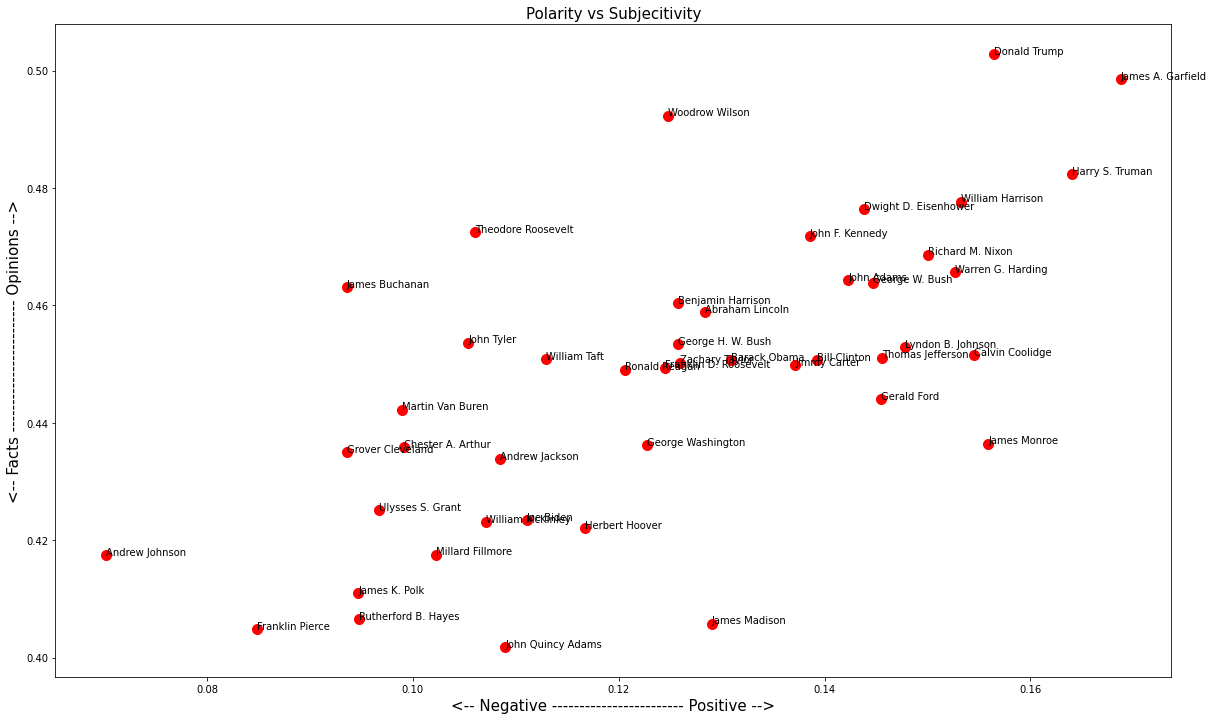

In [ ]:
# Plotting subjectivity against sentiment/polarity
labels = df_tb_plot.index.values.tolist()
X = df_tb_plot['polarity']
Y = df_tb_plot['subjectivity']
fig, ax = plt.subplots(figsize=(20,12))
plt.scatter(X,Y,s=100,color="red")
plt.title("Polarity vs Subjecitivity",fontsize=15)
for i, label in enumerate(labels):
    plt.annotate(label, (X[i], Y[i]))
plt.xlabel('<-- Negative ------------------------ Positive -->', fontsize=15)
plt.ylabel('<-- Facts ------------------------ Opinions -->', fontsize=15)

plt.show()


In [ ]:
#find the frequency of each non-stopword (takes 10-15 mintues to run)
unsorted_frequency = freq.tokenized.str.get_dummies(',').sum()
sorted_frequency = unsorted_frequency.sort_values(ascending = False)

In [ ]:
# data frame of attributes
columns = ['frequency']
word_freq = pd.DataFrame(sorted_frequency[:50], columns = columns)
word_freq

,frequency
'states',933
'united',916
'people',896
'one',893
'government',877
'time',875
'country',869
'may',865
'would',865
'great',852


In [ ]:
df = freq.copy()

In [ ]:
#Installing SpaCy
!conda install -c conda-forge spacy
!python -m spacy download en_core_web_lg

/bin/bash: conda: command not found
2022-10-17 00:23:54.074522: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 8.8 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
#Extracting all trump speeches
df_trump = df[df['name']=='Donald Trump']
trump_tokenized=[]
for i in range(len(df_trump)):
  for word in df_trump.iloc[i,5]:
    trump_tokenized.append(word)
    
#Spacey Sim
#takes about 10 mins to run
# New dataframe
sdf = df

sdf['token_trump'] = [trump_tokenized for i in sdf.index]

separator=','
for i in range(len(sdf)):
    token_trump=sdf.iloc[i,6]
    sdf['trump_all']=separator.join(token_trump)
#Importing SpaCy
import spacy
import pandas as pd

nlp = spacy.load('en_core_web_lg')
#filtered_data = sdf[sdf["name"]=='Donald Trump']

sdf['token_Spacey'] = sdf['speech'].apply(lambda x: nlp(x))

#z=filtered_data.iloc[0, 6]
sdf['trump_all']=sdf['trump_all'].str.replace(',', ' ')
z = sdf.iloc[0:1,7].apply(lambda x: nlp(x))
sdf['token_trump_spacey']=[z[0] for i in sdf.index]
sdf.head()

,name,title,date,speech,no_stopwords,tokenized,token_trump,trump_all,token_Spacey,token_trump_spacey,Word2vec Similarity
0,Joe Biden,"September 1, 2022: Remarks on the Continued Ba...",2022-09-01,"the president: my fellow americans, please,...",president fellow americans please seat take it...,"[president, fellow, americans, please, seat, t...","[fellow, americans, four, years, ago, launched...",fellow americans four years ago launched great...,"( , the, president, :, my, fellow, americans...","(fellow, americans, four, years, ago, launched...",0.921661
1,Joe Biden,"May 24, 2022: Remarks on School Shooting in Uv...",2022-05-24,"good evening, fellow americans. i had hope...",good evening fellow americans hoped became pre...,"[good, evening, fellow, americans, hoped, beca...","[fellow, americans, four, years, ago, launched...",fellow americans four years ago launched great...,"( , good, evening, ,, fellow, americans, ., ...","(fellow, americans, four, years, ago, launched...",0.928729
2,Joe Biden,"March 26, 2022: Remarks in Support of the Peop...",2022-03-26,"the president: thank you, thank you, thank ...",president thank you thank you thank you please...,"[president, thank, you, thank, you, thank, you...","[fellow, americans, four, years, ago, launched...",fellow americans four years ago launched great...,"( , the, president, :, thank, you, ,, thank,...","(fellow, americans, four, years, ago, launched...",0.890049
3,Joe Biden,"March 1, 2022: State of the Union Address",2022-03-01,speaker of the house nancy pelosi: members ...,speaker house nancy pelosi members congress hi...,"[speaker, house, nancy, pelosi, members, congr...","[fellow, americans, four, years, ago, launched...",fellow americans four years ago launched great...,"( , speaker, of, the, house, nancy, pelosi, ...","(fellow, americans, four, years, ago, launched...",0.927304
4,Joe Biden,"February 24, 2022: Remarks on the Russian Inva...",2022-02-24,the president: sorry to keep you waiting. ...,president sorry keep waiting good afternoon ru...,"[president, sorry, keep, waiting, good, aftern...","[fellow, americans, four, years, ago, launched...",fellow americans four years ago launched great...,"( , the, president, :, sorry, to, keep, you,...","(fellow, americans, four, years, ago, launched...",0.917005


In [ ]:
def get_vec_sim(doc1, doc2):   
  return doc1.similarity(doc2) 
sdf['Word2vec Similarity'] = sdf.apply(lambda x: get_vec_sim(x['token_Spacey'],x['token_trump_spacey']),axis=1)


In [ ]:
grouped_by_w2v_close=sdf.groupby('name')[['Word2vec Similarity']].mean() 
grouped_by_w2v_close.drop(['Donald Trump']).sort_values(by = 'Word2vec Similarity',ascending=False)[:5] 


,Word2vec Similarity
name,
Joe Biden,0.919882
Bill Clinton,0.912962
Barack Obama,0.911419
George H. W. Bush,0.904127
Ronald Reagan,0.900859


In [ ]:
grouped_by_w2v_far=sdf.groupby('name')[['Word2vec Similarity']].mean() 
grouped_by_w2v_far.sort_values(by = 'Word2vec Similarity',ascending=True)[:5] 

,Word2vec Similarity
name,
John Quincy Adams,0.787308
Millard Fillmore,0.789754
Rutherford B. Hayes,0.794424
Franklin Pierce,0.794430
James Madison,0.795795


In [ ]:
#Biden Top words
df_biden = sdf[sdf['name']=='Joe Biden']
unsorted_frequency_JB = df_biden.tokenized.str.get_dummies(',').sum()
sorted_frequency_JB = unsorted_frequency_JB.sort_values(ascending = False)

In [ ]:
columns_JB = ['frequency']
word_freq_JB = pd.DataFrame(sorted_frequency_JB[:20], columns = columns)
word_freq_JB

,frequency
'its',17
'let',17
'thats',17
'now',17
'know',17
'president',17
'ago',17
'country',17
'get',17
'world',17


In [ ]:
#JQA Top words
df_JQA = sdf[sdf['name']=='John Quincy Adams']
unsorted_frequency_JQA = df_JQA.tokenized.str.get_dummies(',').sum()
sorted_frequency_JQA = unsorted_frequency_JQA.sort_values(ascending = False)

In [ ]:
columns_JQA = ['frequency']
word_freq_JQA = pd.DataFrame(sorted_frequency_JQA[:20], columns = columns)
word_freq_JQA

,frequency
'upon',8
'intercourse',8
'general',8
'first',8
'government',8
'even',8
'peace',8
'without',8
'nation',8
'among',8


In [ ]:
#Trump Top words
unsorted_frequency_trump = df_trump.tokenized.str.get_dummies(',').sum()
sorted_frequency_trump = unsorted_frequency_trump.sort_values(ascending = False)

In [ ]:
columns_trump = ['frequency']
word_freq_trump = pd.DataFrame(sorted_frequency_trump[:20], columns = columns)
word_freq_trump

,frequency
'people',43
'us',43
'you',42
'thank',42
'great',42
'want',42
'one',41
'american',40
'united',40
'country',40
